In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from paths import *
from ssd_paths import *
from misc_recorder import *

In [31]:
hyper_dir = model_save_

In [46]:
res = {"ff": [], "lf": [], "hf": []}

In [47]:
for subdir in sorted(os.listdir(hyper_dir)): 
    if subdir.startswith("H02"):
        for subsubdir in ["ff", "lf", "hf"]:
            this_dir = os.path.join(hyper_dir, subdir, subsubdir)
            val_accs = ListRecorder(os.path.join(this_dir, "valacc.hst"))
            val_accs.read()
            res[subsubdir].append(np.mean(val_accs.record[39:60]))

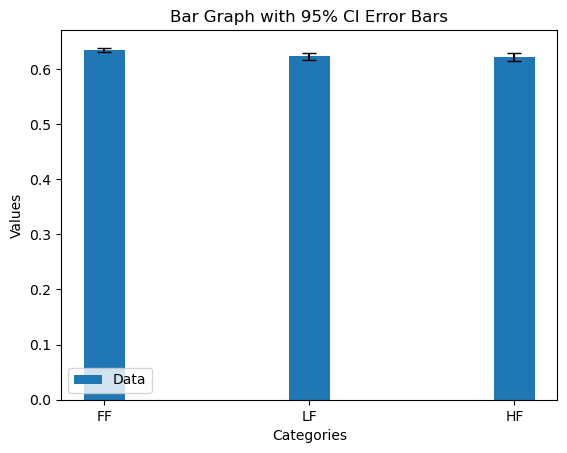

In [48]:
# Sample data for three sets
data_set1 = res["ff"]
data_set2 = res["lf"]
data_set3 = res["hf"]

# Calculate the mean and standard error for each data set
mean_set1 = np.mean(data_set1)
mean_set2 = np.mean(data_set2)
mean_set3 = np.mean(data_set3)

n_set1 = len(data_set1)
n_set2 = len(data_set2)
n_set3 = len(data_set3)

std_err_set1 = stats.sem(data_set1)
std_err_set2 = stats.sem(data_set2)
std_err_set3 = stats.sem(data_set3)

# Calculate the confidence intervals (95% CI)
ci_set1 = stats.t.interval(0.95, df=n_set1 - 1, loc=mean_set1, scale=std_err_set1)
ci_set2 = stats.t.interval(0.95, df=n_set2 - 1, loc=mean_set2, scale=std_err_set2)
ci_set3 = stats.t.interval(0.95, df=n_set3 - 1, loc=mean_set3, scale=std_err_set3)

# X-axis values (assuming you have categories or labels for each data point)
x_labels = ['FF', 'LF', 'HF']

# Create an array of x values for each set
x = range(len(x_labels))

# Create the bar graph with error barsimport numpy as np
from scipy import stats

plt.bar(x, [mean_set1, mean_set2, mean_set3], yerr=[(ci_set1[1] - mean_set1, ci_set2[1] - mean_set2, ci_set3[1] - mean_set3), 
                                                    (mean_set1 - ci_set1[0], mean_set2 - ci_set2[0], mean_set3 - ci_set3[0])],
        label='Data', capsize=5, width=0.2, align='center')

# Set the x-axis ticks and labels
plt.xticks(x, x_labels)

# Add labels and a legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph with 95% CI Error Bars')
plt.legend()

# Show the plot
plt.show()


In [49]:
for pair in [("ff", "lf"), ("ff", "hf"), ("lf", "hf")]:
    data_set1 = res[pair[0]]
    data_set2 = res[pair[1]]
    t_test_statistic, p_value = stats.ttest_ind(data_set1, data_set2)
    print("T-test for {} and {}: t = {}, p = {}".format(pair[0], pair[1], t_test_statistic, p_value))

T-test for ff and lf: t = 3.509184599745492, p = 0.003471270096913689
T-test for ff and hf: t = 3.6744525361064175, p = 0.002500700276814533
T-test for lf and hf: t = 0.24303330844525697, p = 0.8115042763775615
